In [ ]:
# Import statements
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

#display figures in Jupyter Notebook
%matplotlib inline

# importing the necessary dependencies
# data uploading

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':"1iItuUG6RmFy-Y2_R-J7nDkWiqL3CnrhN"})   # replace the id with id of file you want to access
downloaded.GetContentFile('movie_scores.csv')  
# loading the Dataset

In [ ]:
# Load dataset
movie_scores = pd.read_csv('movie_scores.csv')

In [ ]:
movie_scores.head(6)

,Unnamed: 0,MovieTitle,Tomatometer,AudienceScore
0,0,The Shape of Water,91,73
1,1,Black Panther,97,79
2,2,Dunkirk,92,81
3,3,The Martian,91,91
4,4,The Hobbit: An Unexpected Journey,64,83


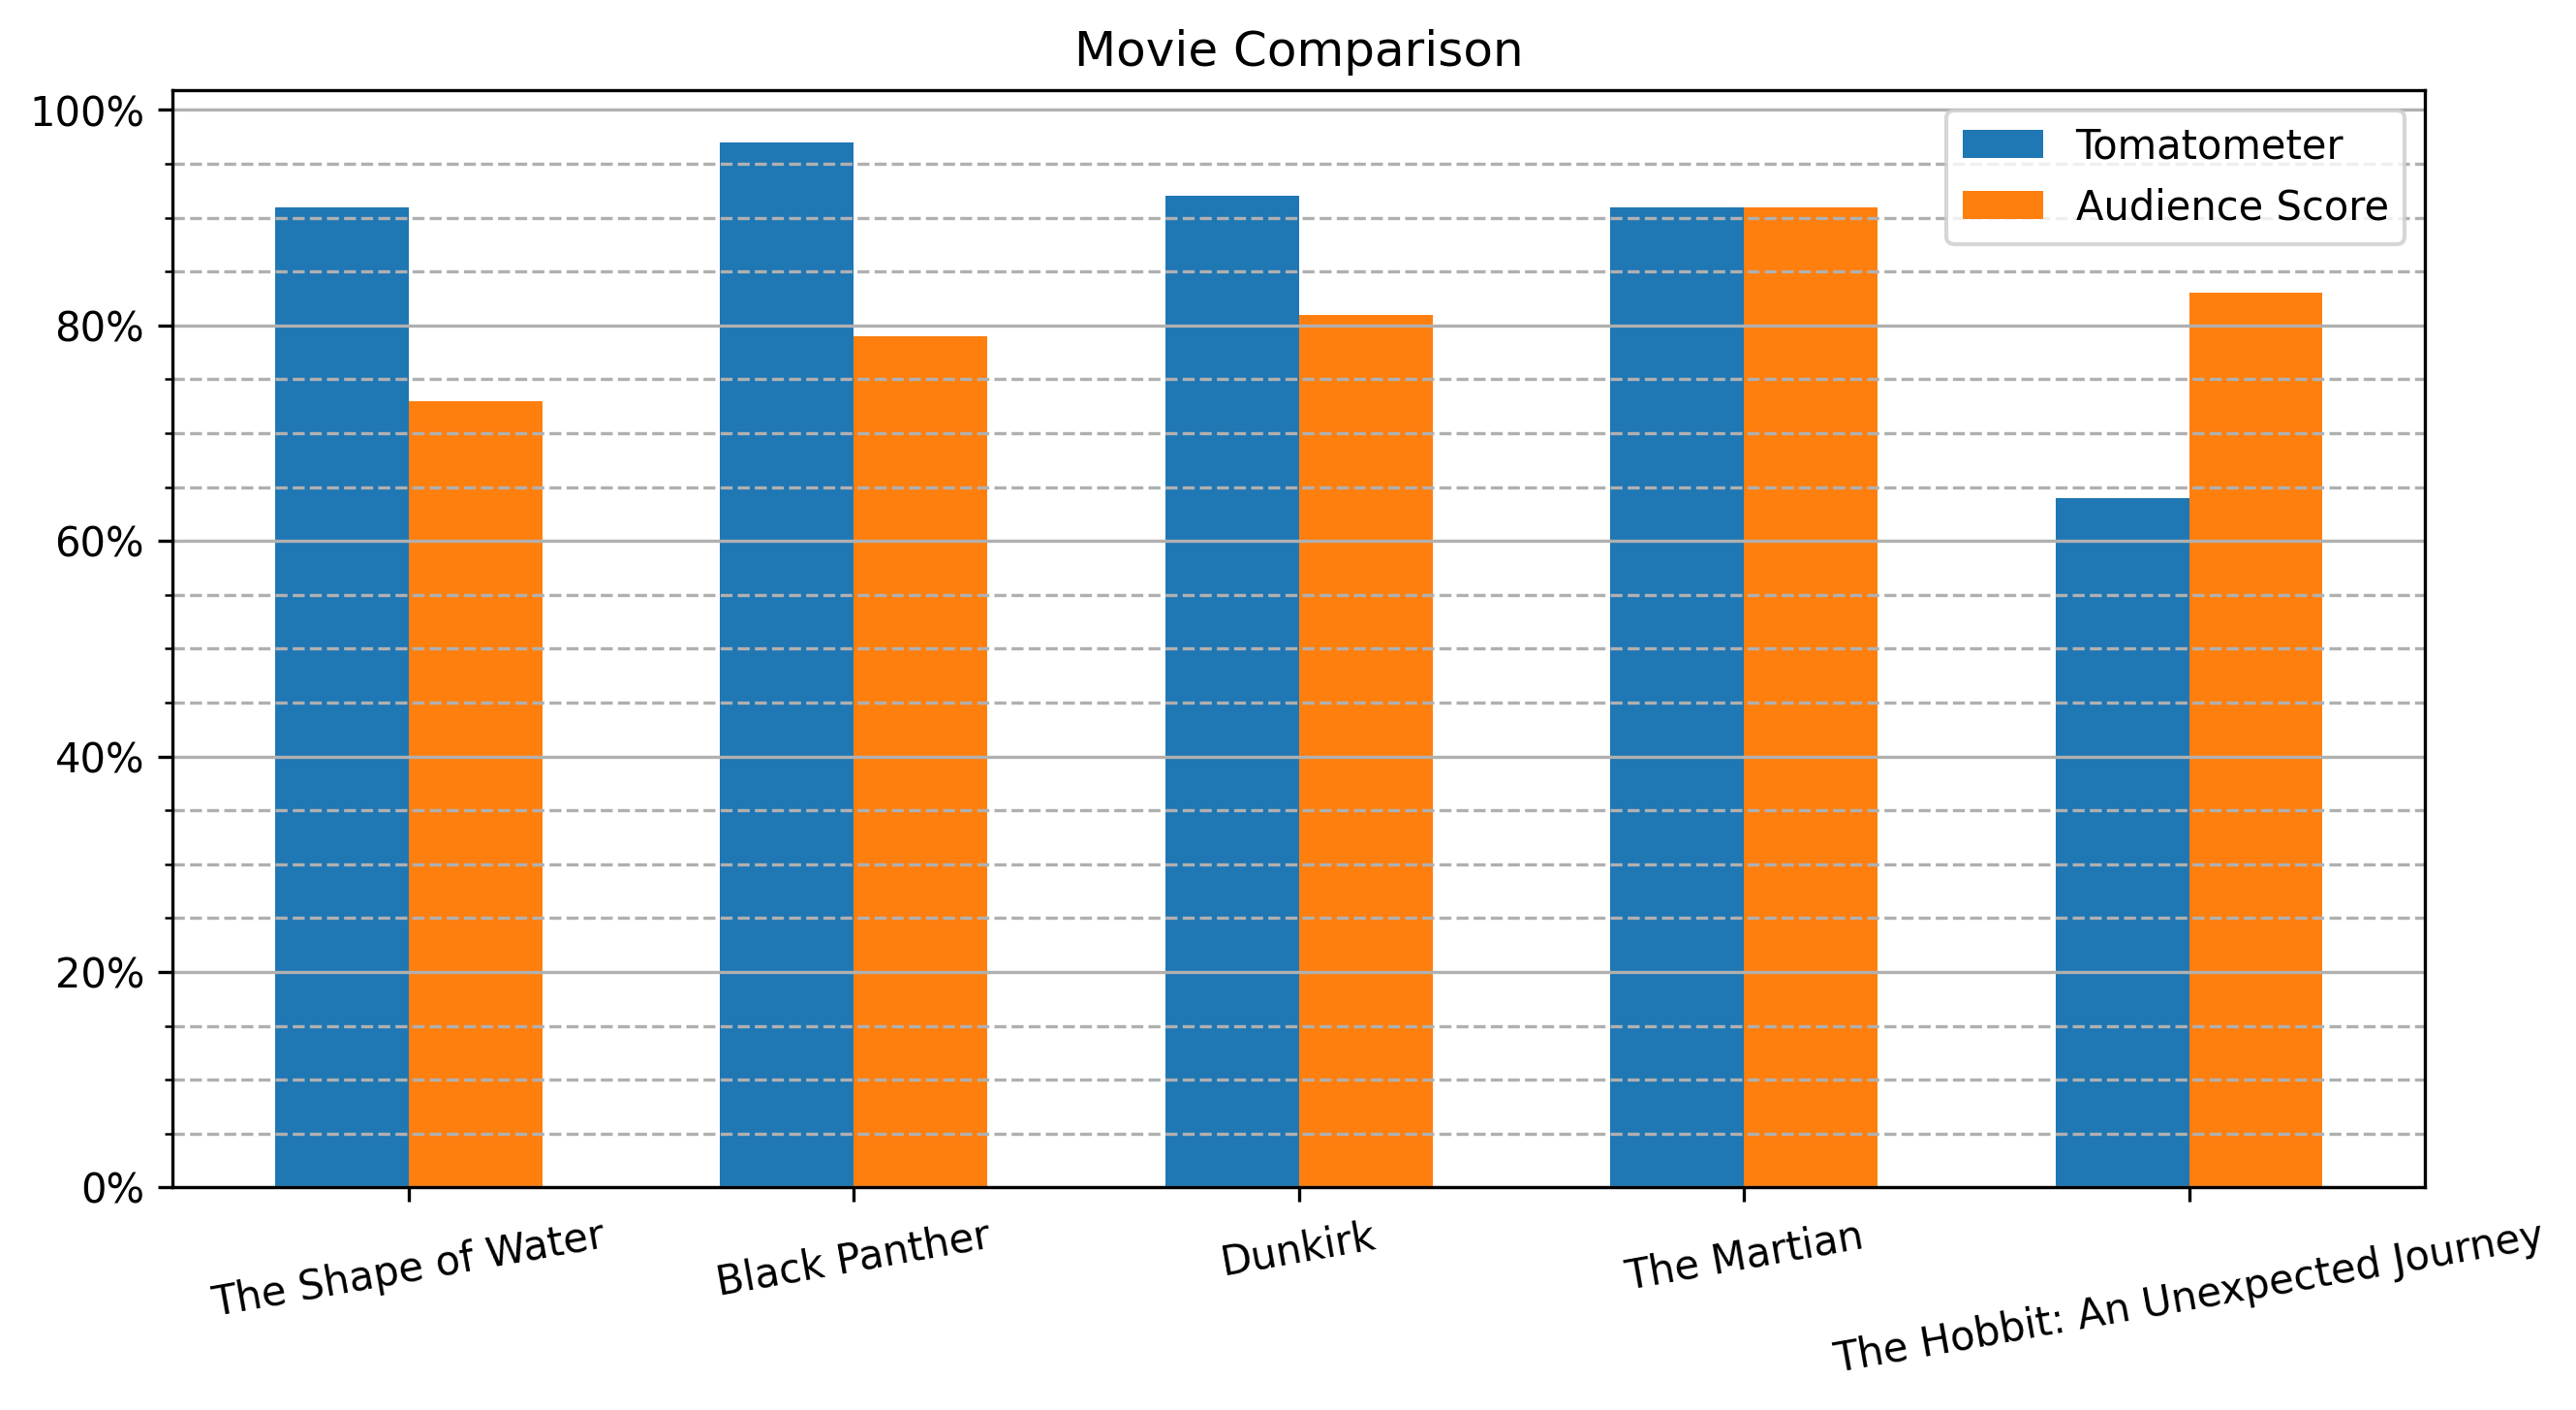

In [ ]:
#Create Figure
plt.figure(figsize=(10,5), dpi=300)
#Create parameter values for the bar plot
width = 0.3
pos = np.arange(len(movie_scores['MovieTitle']))
#Plot the Bar graph (Setup) - Dividing the graphs into half using different x coordinates
plt.bar(pos - width / 2, movie_scores['Tomatometer'], width, label='Tomatometer')
plt.bar(pos + width / 2, movie_scores['AudienceScore'], width, label='Audience Score')
#Specify Ticks
plt.xticks(pos,rotation = 10)
plt.yticks(np.arange(0,101,20))

#Get current Axes for setting tick labels and horizontal grid
ax =plt.gca()
#Set tick labels
ax.set_xticklabels(movie_scores['MovieTitle'])
ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
#Set minor ticks for y-axis (different interval)
ax.set_yticks(np.arange(0,100,5), minor=True)
#Solid line horizontal grid (Major)
ax.yaxis.grid(which ='major')
#Dashed line horizontal grid (Minor)
ax.yaxis.grid(which ='minor', linestyle ='--')
#Add title
plt.title('Movie Comparison')
#Add Legend
plt.legend()
#Show the plot
plt.show()